<a href="https://colab.research.google.com/github/Mentlejain/Image-Quantization/blob/main/Image_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Uploading Image

Original image: 


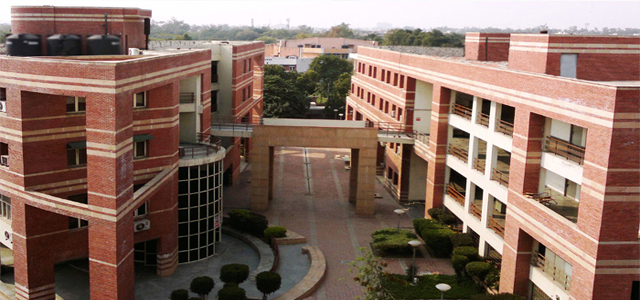

In [8]:
img = cv2.imread(r"/content/drive/MyDrive/Sample Images/Sample 1.png",cv2.COLOR_BGR2RGB)
print("Original image: ")
cv2_imshow(img)

# Seperating Colours as one dimensional vectors

In [9]:
r=img[:,:,0]
g=img[:,:,1]
b=img[:,:,2]
r=r.flatten()
g=g.flatten()
b=b.flatten()
img_data=np.dstack((r,g,b))[0]

# Importing Kmeans

In [10]:
from sklearn.cluster import KMeans

# Function for Applying KMeans to the Pixel Data and reconstructing the Image

In [11]:
def reconstruct(img,bits):
  n=2**bits
  km=KMeans(n,random_state=0)
  km.fit(img_data)
  ri=np.zeros(img.shape)
  for i in range(img.shape[0]):
    t=km.predict(img[i])
    ri[i,:] = [km.cluster_centers_[l] for l in t]
  return(ri)

## Reconstructed Image (4 bit Quantization)

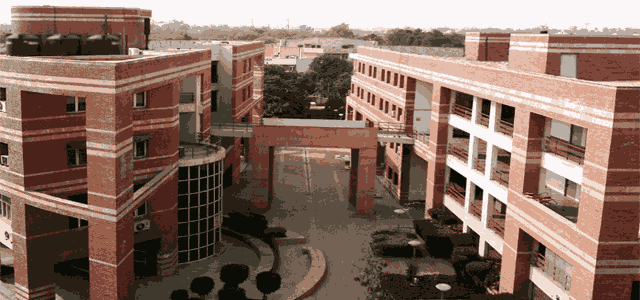

In [12]:
ri4=reconstruct(img,4)
cv2.imwrite('/content/drive/MyDrive/Sample Images/4bit Reconstructed1.png',ri4)
cv2_imshow(ri4)

## Reconstructed Image (8 bit Quantization)

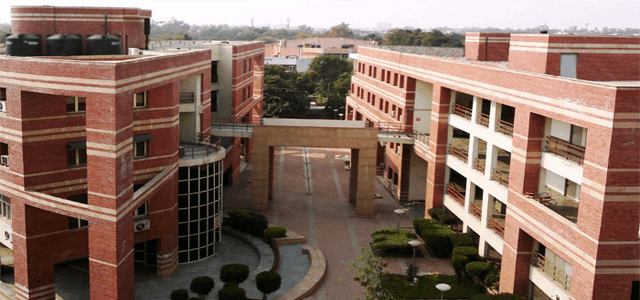

In [13]:
ri8=reconstruct(img,8)
cv2.imwrite('/content/drive/MyDrive/Sample Images/8bit Reconstructed1.png',ri8)
cv2_imshow(ri8)

## Reconstructed Image (12 bit Quantization)

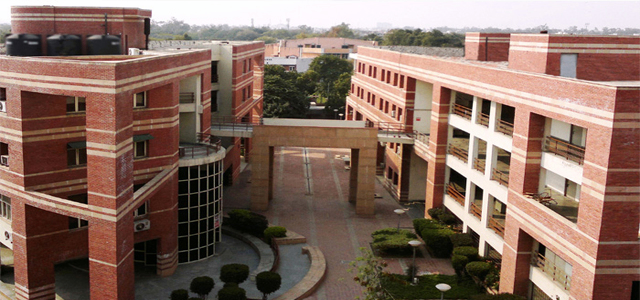

In [14]:
ri12=reconstruct(img,12)
cv2.imwrite('/content/drive/MyDrive/Sample Images/12bit Reconstructed1.png',ri12)
cv2_imshow(ri12)

In [2]:
import IPython
from IPython.display import display, HTML, IFrame 

In [9]:
display(HTML(filename='/content/index.html',))

In [ ]:
!cp  "/content/drive/MyDrive/Colab Notebooks/Image Quantization.ipynb" ./
!jupyter nbconvert --to html "Image Quantization.ipynb"